# Stoneburner, Kurt
- ## DSC 650 - Week 06
- ## Assignment 6.2 - ConvNet Model that classifies images in the CIFAR digital dataset.

This is mostly copy/pasted code from a website I found online. I've added notes to model layers to help with my understanding and includes notes on keras activation functions. I built the final model based on an evaluation of the validation model. I imported the plotting functions from a previous exercise.

Reference:
https://keras.io/api/datasets/cifar10/

CIFAR and Data augmentation
https://stepup.ai/train_data_augmentation_keras/



Max-Pooling Explained: 
https://analyticsindiamag.com/max-pooling-in-convolutional-neural-network-and-its-features/

Conv2D Official Documentation:
https://keras.io/api/layers/convolution_layers/convolution2d/

In [1]:
"""
#//*** Enable Plaid-Ml GPU backend for Radeon Cards. (it works faster on some things)
from os import environ

environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import tensorflow.keras
"""
print()

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [3]:
#//********************************************************
#//*** Plot a Fitted Models History of Loss and Accuracy
#//********************************************************
def plot_model_history(input_history,loss='loss',acc='accuracy'):
    print(input_history.history.keys())
    loss = input_history.history[list(input_history.history.keys())[0]]
    acc = input_history.history[list(input_history.history.keys())[1]]
    
    
    
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, "b", label="Training Accuracy")
    plt.title("Training Accuracy\nAccuracy should go up")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    

    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training Loss")
    
    plt.title("Training Loss \nLoss should go down")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
#//****************************************************************
#//*** Plot a Fitted Models History Training and Validation Loss
#//****************************************************************
def plot_model_validation(input_history):
    
    #//*** Assign Loss/Accuracy/Validation Loss/Validation Accuracy
    #//*** Based on Dictionary Key Tuple position
    
    loss = input_history.history[list(input_history.history.keys())[0]]
    acc = input_history.history[list(input_history.history.keys())[1]]
    val_loss = input_history.history[list(input_history.history.keys())[2]]
    val_acc = input_history.history[list(input_history.history.keys())[3]]
    #print(loss,acc,val_loss,val_acc)
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    #//*** Plot the Validation Set Accuracy
    plt.clf()
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()    


**Assignment 6.2a**

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. 
Do not use dropout or data-augmentation in this part. 

Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [4]:


#//*** Inputs reflects the shape of each individual piece of data.
#//*** The MNIST is a 28x28 single channel image.
#//*** The third is 1 channel. This is a greyscale image, therefore it only uses one channel.
#//*** See Link above for further explanation

#//*** Conv2D: Filters defines the number of tensors at the layer. Kernal_size = feature detection size. The default is 3x3.
#//***         Conv2D reduces the image size by (filter_size - 1) in each dimension.
#//*** MaxPooling2D: Is a form of feature reduction. In this case, The Max-Pooling layer takes the reduced feature mapped data and processes by pool_size (default 2x2). Only the highest value in the 
#//***               pool-size value (2x2) is kept. With a pool value of 2x2 this essentially cuts the shape in half for each dimension. With a pool_size of 2 (4 pixels) only 1 is kept, this reduces the features
#//***               by 75%.
#//***               At each stage of max pooling, the image gets smaller. Subsequent conv2d layers perform feature extraction on a reduced set of features. Each layer has less information and more tensors looking
#//***               for relationships between the reduced features. The model becomes more general (and abstract) as it moves through the layers. It's kind of brilliant.



Reference:
https://machinelearningknowledge.ai/keras-activation-layers-ultimate-guide-for-beginners/

### Keras Activation Cheat Sheet ###


**relu**: Rectified linear unit.

    - ReLu activation function is computationally efficient hence it enables neural networks to converge faster during the training phase.
    - It is both non-linear and differentiable which are good characteristics for activation function.
    - ReLU does not suffer from the issue of Vanishing Gradient issue like other activation functions and hence it is very effective in hidden layers of large neural networks.
    
    Data used in **ReLu** layers must be positive. Negative numbers cannot be back-propagated and these values basically 'die'.


**softmax:** Generates a weighted value between 0 and 1. Use for multiple classification tasks.

**sigmoid:** Generates either 0 or 1. Data must be normalized. Does not handle outliers well Use for Binary Classification tasks.

**tanh:** Generates values from -1 to +1. Data must be normalized. Does not handle outliers well.

#### Which Activation Function to use in Neural Network? ####

**Sigmoid** and Tanh activation function should be avoided in hidden layers as they suffer from Vanishing Gradient problem.

**Sigmoid** activation function should be used in the output layer in case of Binary Classification

**ReLU** activation functions are ideal for hidden layers of neural networks as they do not suffer from the Vanishing Gradient problem and are computationally fast.

**Softmax** activation function should be used in the output layer in case of multiclass classification.





| Label | Description   | 
|-------|--------------:|
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |



Returns

    Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

**x_train**: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

**y_train**: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

**y_test**: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

(5000, 32, 32, 3)
(5000, 1)
(5000, 32, 32, 3)
(5000, 1)


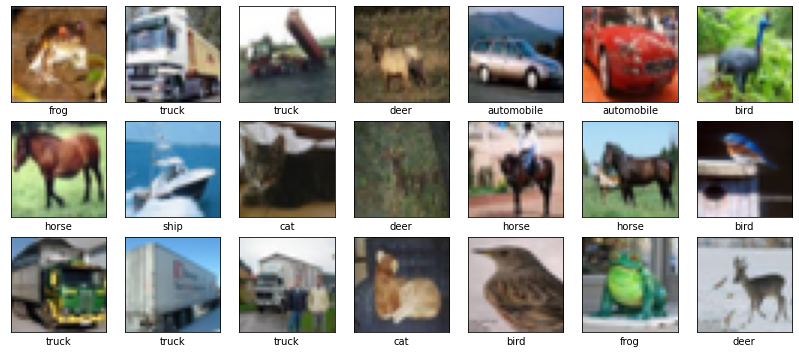

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

#//*** Load the CIFAR10 dataset into the default test train splits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


#//*** Build a subset of the data for model exploration
subset_size = 5000

#//*** Generate Partial validation sets
x_validation = x_train[subset_size:subset_size*2]
y_validation = y_train[subset_size:subset_size*2]

#//*** Validation subset
x_train = x_train[:subset_size]
y_train = y_train[:subset_size]


print(x_train.shape)
print(y_train.shape)

#//*** Verify the subsets are the proper shape
assert x_train.shape == (subset_size, 32, 32, 3)
assert y_train.shape == (subset_size, 1)

#//*** Max test size is 10000
if subset_size > 10000:
    subset_size = 10000

x_test = x_test[:subset_size]
y_test = y_test[:subset_size]

print(x_test.shape)
print(y_test.shape)

#//*** Verify the subsets are the proper shape
assert x_test.shape == (subset_size, 32, 32, 3)
assert y_test.shape == (subset_size, 1)


x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

In [6]:
def create_model():
    
    #//*** Using relu (Rectified Linear Units) for the hidden layers. This is good all-purpose ML choice.
    #//*** Using Convolution2d kernal_size =3, create unique features for each 3x3 group of pixels
    #//*** MaxPooling 2, takes the 3x3 feature pixels (which are now represented as a single feature pixel). The feature pixels are organized into groups of 2x2 pixels and only the highest value is kept.
    #//*** This reduces the features by 75% per feature group. This is a generalization step.
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________

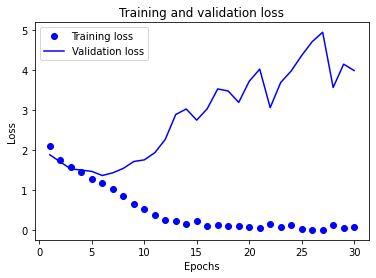

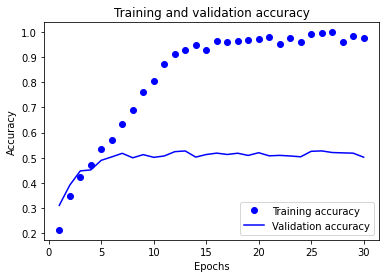

In [7]:
batch_size = 32
epochs = 30
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

print(f"Test accuracy: {acc_no_aug:.3f}")



plot_model_validation(history_no_aug)

## Run No-Augmentation Model with full dataset ## 
14 Epochs is seems to be a good balance between fitting and over fitting - Using 5000 Samples. 22 Epochs was a good value when testing with 1000 Samples.

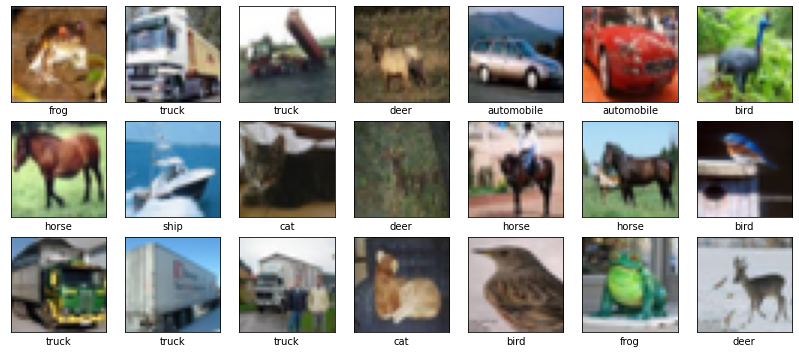

In [8]:
#//*** Reload full data set
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

#//*** Load the CIFAR10 dataset into the default test train splits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


#//*** Verify the subsets are the proper shape
assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000, 1)

#//*** Verify the subsets are the proper shape
assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

#//*** Not sure why x_train is divided by 255 or why Y_train is converted to explicit cetgoricals. 
x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

#//*** Display Sample of Data
visualize_data(x_train, y_train, class_names)

In [ ]:
#//*** 14 Epochs to prevent overfitting
batch_size = 32
epochs = 14
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

print(f"Model accuracy: {acc_no_aug:.3f}")


plot_model_history(history_no_aug)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

# Assignment 6.2.b #

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation.

In [ ]:
import scipy
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

#//*** Load the CIFAR10 dataset into the default test train splits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
print("Transformed images")
visualize_data(batch_images, batch_labels, class_names)

In [ ]:
batch_size = 32
epochs = 14
model = create_model()
model.summary()

history = model.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    #validation_data=(x_test, y_test)
)

loss, acc = model.evaluate(batch_images,  batch_labels)

print(f"Model accuracy: {acc:.3f}")


plot_model_history(history)